In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Bonds') + ['AGG', 'BND', 'BNDX', 'BIV', 'SCHZ'], 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-05-20 to 2019-07-05 - 77


In [3]:
stats = quote.statistics()
stats = stats[(stats['shrp'] > 0.2) & (stats['std'] > 0.1)]
print(len(stats))
stats

62


,len,mean,std,shrp,drawdown
Symbols,,,,,
BNDX,28,0.467005,0.226380,1.887634,0.193599
EMLC,28,1.237013,0.719402,1.664341,0.374211
IGIB,28,0.629691,0.367536,1.605305,0.543195
VCIT,28,0.643837,0.382579,1.579161,0.533337
USIG,28,0.652263,0.404259,1.515317,0.611565
SPIB,28,0.443928,0.266858,1.514833,0.429189
LQD,28,0.848275,0.548477,1.474250,0.880492
VCLT,28,1.206693,0.820153,1.422919,1.112590
VWOB,28,0.779518,0.544032,1.359912,0.695306


evicted PZA 0.8263928501939574
evicted ITM 0.8739046191025645
evicted CMF 0.8462795627508767
evicted HYLS 0.8613071517926025
evicted BSJK 0.885416330359301
evicted ISTB 0.8476786387132657
evicted IPE 0.8126119843084336
evicted LMBS 0.7525378794946931
evicted SHYG 0.8933316307191573
evicted BSCK 0.8449641001458995
evicted IBDL 0.7560118033444627
evicted BLV 0.873565139499063
evicted IGIB 0.8656020808320518
evicted VCLT 0.6214355702377018
evicted BWX 0.5916817240534079
evicted TFI 0.6752281398291385
evicted TLT 0.683578359698688
evicted VWOB 0.7634432256874923
evicted SUB 0.4862440623655161
retry backlogs ['VMBS', 'SPIB', 'IEI', 'IEF', 'SJNK', 'VTEB', 'MBB', 'IGSB', 'MUB', 'BSV', 'STIP', 'VTIP', 'SCHO', 'HYG', 'TIP', 'BND', 'TDTT', 'SPTL', 'SPTS', 'VCSH', 'VGSH', 'VCIT', 'SHY', 'SCHP', 'SLQD', 'VGIT', 'AGG', 'SCHZ', 'SPSB', 'SCHR', 'BIV', 'JNK', 'HYS', 'HYLB', 'GOVT', 'USIG', 'LQD', 'EMB'] at 0.905 - 2.621
evicted VMBS 0.9015938351079179
evicted SCHP 0.8904409978165309
evicted VTEB 0.791

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,28.0,0.417489,0.149114,0.141827,0.310438,0.414653,0.541029,0.710630,2.533678,0.184353
BNDX,28.0,0.467005,0.226380,0.000000,0.296814,0.517803,0.643865,0.830923,1.887634,0.193599
EMLC,28.0,1.237013,0.719402,0.260488,0.591491,1.145575,1.740367,2.768686,1.664341,0.374211
HYD,28.0,0.185122,0.176218,-0.330397,0.096314,0.212954,0.275287,0.562295,0.825339,0.409065
NUV,28.0,0.419722,0.702485,-0.785085,-0.065110,0.494314,0.994609,1.500000,0.540994,0.982322
CWB,28.0,0.687270,1.297310,-1.777424,-0.341396,0.953062,1.494149,3.391522,0.499177,2.436365


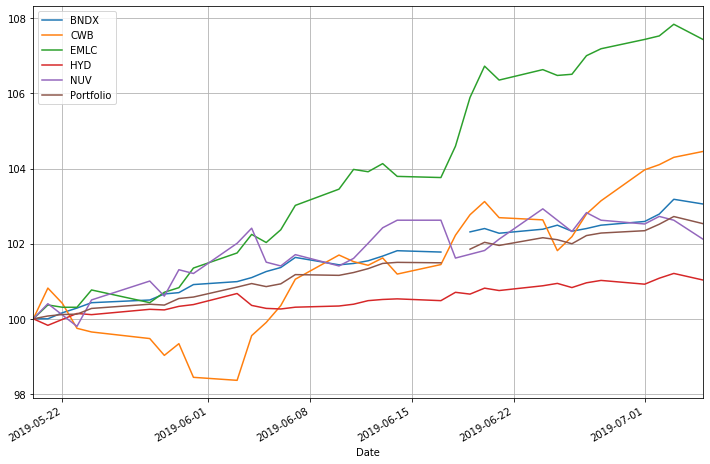

In [7]:
quote.setup_mask(stats.index)
ratio, shrp = quote.optimize_portfolio()
print(ratio, shrp)
quote.setup_mask(ratio)
quote.graph(ratio)